<a href="https://colab.research.google.com/github/niroshank/data-mining-models/blob/master/Section_C_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import required libries
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()

**Data Preprocessing**

In [0]:
# Create a dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add target column to the dataframe
df['target'] = iris.target
# Extracting the associated target names using lambda function
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [0]:
# Group the dataframe by target and get the first record
df.groupby(['flower_name']).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
flower_name,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


We can identify some variations between the means of flowers. Viriginca's sepal and petal are 19.59cm^2 and 11.25cm^2 larger than other two flowers.

**Visualize the dataset**

In [0]:
# Divide the dataset into 3 sections for a comparative assessment
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

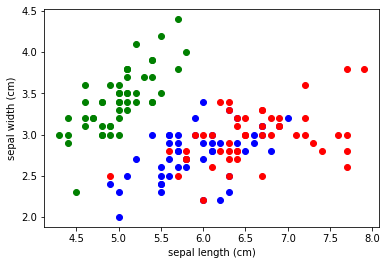

In [0]:
# Using sepal length and sepal width
# This shows setosa has large sepal than other two.
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green") # setosa
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue") # versicolor
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color="red") # virginica

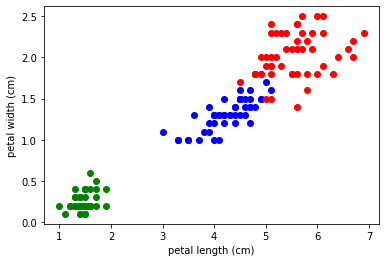

In [0]:
# Using petal length and petal width
# This shows that setosa has the smallest petal comparing to other.
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green") # setosa
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue") # versicolor
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="red") #virginica

**Splitting dataset**

In [0]:
# Create two dataframe to features and targets by dividing the main dataframe
inputs = df.drop(['target', 'flower_name'], axis='columns')
targets = df.target
inputs.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [0]:
# Divide dataset into train and test, 77% for traniing and 33% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.33)

**Identify the best kernel and C value**

In [0]:
# Create the SVM model
# To idetify the best algorithm for this dataset, 'plot decision' regions are used.
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

# Since plot decision regions only accepts 2D array, X_train transform to 2 dimensional array
pca = PCA(n_components = 2)
X_train_2D = pca.fit_transform(X_train)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


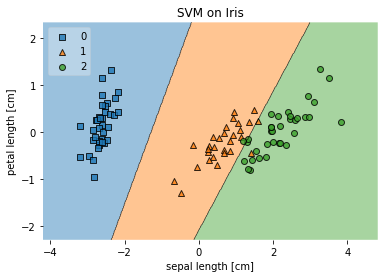

In [0]:
# Linear kernal
from sklearn.svm import SVC
model_ln = SVC(kernel='linear')
model_ln.fit(X_train_2D, y_train)

# Plotting
plot_decision_regions(X_train_2D, y_train.to_numpy(), clf=model_ln, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


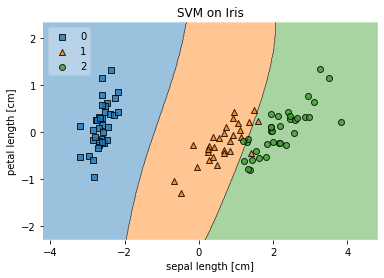

In [0]:
# Non-linear kernal
from sklearn.svm import SVC
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train_2D, y_train)

# ploting
plot_decision_regions(X_train_2D, y_train.to_numpy(), clf=model_rbf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

Above plots proves that both Linear and rbf works perfect with iris dataset.

In [0]:
# Identify the ideal C value
for C in [0.1, 0.5, 1.0, 2.0, 4.0]:
  clf_rbf = SVC(kernel='rbf', C=C, gamma='auto')
  clf_ln = SVC(kernel='linear', C=C, gamma='auto')
  clf_rbf.fit(X_train, y_train)
  clf_ln.fit(X_train, y_train)
  scores_rbf = clf_rbf.score(X_test, y_test)
  scores_ln = clf_ln.score(X_test, y_test)
  print("rbf", C, scores_rbf * 100)
  print("ln", C, scores_ln * 100)

rbf 0.1 98.0
ln 0.1 98.0
rbf 0.5 98.0
ln 0.5 100.0
rbf 1.0 100.0
ln 1.0 98.0
rbf 2.0 100.0
ln 2.0 98.0
rbf 4.0 100.0
ln 4.0 98.0


**Finalize the model**

In [0]:
# Create final model using above results
model = SVC(kernel='rbf', C=0.5, gamma='auto')
model.fit(X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Test the model**

In [0]:
# Get the score of the final model
model.score(X_test, y_test)

0.98

In [0]:
print("Actual value is", iris.target_names[y_test.to_numpy()[0]])
x = model.predict([X_test.to_numpy()[0]])
if x[0] == 0:
  print("Predicted as a setosa")
elif x[0] == 1:
  print("Predicted as a versicolor")
elif x[0] == 2:
  print("Predicted as a virginica")

Actual value is versicolor
Predicted as a versicolor


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(69.0, 0.5, 'Truth')

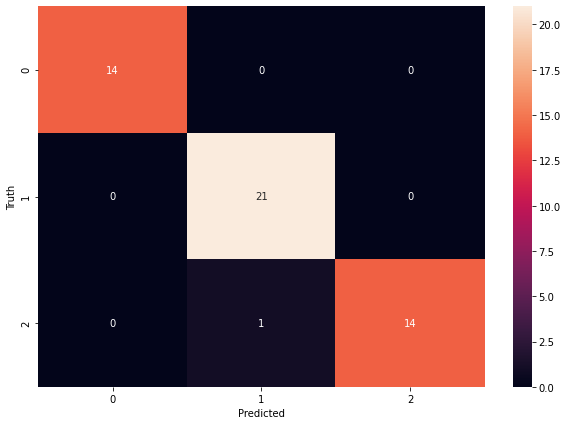

In [0]:
# Ploting a confusion matrix
import seaborn as sn # to create a heatmap
from sklearn.metrics import confusion_matrix
y_predicted=model.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [0]:
#Finding the accuracy of support vector machine model from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0
for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('Accuracy of the multiclass logistic classification is: ', corrPred/(cm.sum()))

Correct predictions:  49
False predictions 1
Accuracy of the multiclass logistic classification is:  0.98
